##### Grading Feedback Cell

**Question 0 (-2 pts if not provided):**  Enter your name and SU ID in the cell below.

Your name and SU ID Here:Abhijith Anil Vamadev 495204994


# IST 718: Big Data Analytics

- Professors: 
  - Willard Williamson <wewillia@syr.edu>
  - Emory Creel <emcreel@syr.edu>
- Faculty Assistants: 
  - Warren Justin Fernandes <warrenfds25@gmail.com>
  - Ruchita Hiteshkumar Harsora <	rharsora@g.syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- Google Colab is the official class runtime environment so you should test your code on Colab before submission.
- Do not modify cells marked as grading cells or marked as do not modify.
- Before submitting your work, remember to check for run time errors with the following procedure:
`Runtime `$\rightarrow$ Factory reset runtime followed by Runtime $\rightarrow$ Run All.  All runtime errors will result in a minimum penalty of half off.
- All plots shall include descriptive title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Your notebook must run from start to finish without requiring manual input by the graders.  For example, do not mount your personal Google drive in your notebook as this will require graders to perform manual steps.  In short, your notebook should run from start to finish with no runtime errors and no need for graders to perform any manual steps.

In [1]:
%%bash
# Do not change or modify this cell

# if pyspark is already installed, will print a message indicating pyspark already installed
pip install pyspark &> /dev/null

# define an array of data file names
data_file_array=("indicator_gapminder_population.csv" "indicator_gapminder_under5mortality.csv" "indicator_life_expectancy_at_birth.csv" "indicator_undata_total_fertility.csv" "continents.tsv")

# Download the UN Indicator data from github
# for each data file
for file in ${data_file_array[@]}; do
  echo ${file}
  # if the data file does not exist on the local computer
  if [[ ! -f ./${file} ]]; then 
    # download the data file from github and save it on the local computer
    wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/${file} &> /dev/null
  fi  
done

# Download the city temp data file from github
data_file=city_temperatures.csv
echo ${data_file}

# If the data file does not exist in the colab environment
if [[ ! -f ./${data_file} ]]; then 
   # download the data file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/${data_file} &>/dev/null
fi

indicator_gapminder_population.csv
indicator_gapminder_under5mortality.csv
indicator_life_expectancy_at_birth.csv
indicator_undata_total_fertility.csv
continents.tsv
city_temperatures.csv


# Part 1: Map / Reduce
Part 1 uses the central limit theorem to provide you with an opportunity to practice using the map / reduce programming paradigm.

Note: Starting with this homework and moving forward, students are expected to use spark as opposed to numpy or pandas unless directed otherwise.  This note will not be repeated in the future.

# Question 1: Central Limit Theorem Simulation (10 pts)
Create a single dimensional pyspark RDD named bernoulli_rdd that contains 10,000 Bernoulli probability distribution data points consisting of integer 0 or 1.  P(0) = P(1) = 0.5.  Use only pyspark RDDs to complete this question.  Create a histogram of the RDD to show that it follows the Bernoulli distribution.  As always, you are allowed to use python / pandas / matplotlib to make your plot but do use spark to create thedistribution.

Text(0.5, 1.0, 'Bernoulli distrubiton of 1 and 0 over 10000 trials of 0.5 probability')

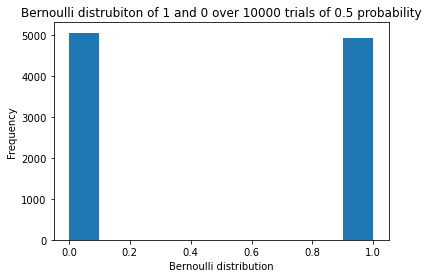

In [16]:
# your code here
from pyspark.sql import SparkSession
import numpy as np
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName('spark-intro').getOrCreate()
sc = spark.sparkContext
from pyspark.sql import Row
from pyspark.sql import functions as fn
n, p = 1, .5  # number of trials, probability of each trial
np.random.seed(0)
s = np.random.binomial(n, p, 10000)
bernoulli_rdd = sc.parallelize(s)
plt.hist(bernoulli_rdd.collect())
plt.xlabel('Bernoulli distribution')
plt.ylabel('Frequency')
plt.title('Bernoulli distrubiton of 1 and 0 over 10000 trials of 0.5 probability')

##### Grading Feedback Cell

# Question 2: Sample the Bernoulli distribution using CLT (10 pts)
Using principals from CLT theory, create a new 2 dimensional RDD named bernoulli_sample_rdd that contains sample data from bernoulli_rdd.  The length of bernoulli_sample_rdd should be the number of samples.  Each data element in bernoulli_sample_rdd should contain num_obs_per_sample.

In [17]:
# your code here
import random
bernoulli_sample_rdd = [random.sample(bernoulli_rdd.collect(), 100) for i in range(100) ] #100 samples with each sample containing 100 items
bernoulli_sample_rdd = sc.parallelize(bernoulli_sample_rdd)
# bernoulli_sample_rdd = [bernoulli_rdd.sample(False, 0.01) for i in range(100)]
# # bernoulli_sample_rdd[0].collect()
# bernoulli_sample_rdd = sc.parallelize(s)
# len(bernoulli_sample_rdd.collect())

##### Grading Feedback Cell

# Question 3: Create Sampling Distribution (20 pts)
Using pyspark map and reduce, create a new RDD named bernoulli_sample_mean_rdd that contains the sampling distribution of the means of the samples contained in bernoulli_sample_rdd.  Create a histogram from bernoulli_sample_mean_rdd to prove that the resulting distribution follows the principals of the CLT.

In [15]:
# your code here
def average(x):
    return float(sum(x)/len(x))
bernoulli_sample_mean_rdd = bernoulli_sample_rdd.map(average)

plt.hist(bernoulli_sample_mean_rdd.collect())
# plt.xlabel('Bernoulli distribution')
# plt.ylabel('Frequency')
# plt.title('Bernoulli distrubiton of 1 and 0 over 10000 trials of 0.5 probability')

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 3 in stage 104.0 failed 1 times, most recent failure: Lost task 3.0 in stage 104.0 (TID 1667) (AbhijithAV.mshome.net executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.waitForNewConnection(Native Method)
	at java.base/java.net.PlainSocketImpl.socketAccept(PlainSocketImpl.java:163)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:458)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:565)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:533)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:174)
	... 14 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2261)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:180)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at jdk.internal.reflect.GeneratedMethodAccessor60.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.waitForNewConnection(Native Method)
	at java.base/java.net.PlainSocketImpl.socketAccept(PlainSocketImpl.java:163)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:458)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:565)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:533)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:174)
	... 14 more


In [11]:
from pyspark.sql import SparkSession
import numpy as np
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName('spark-intro').getOrCreate()
sc = spark.sparkContext
from pyspark.sql import Row
from pyspark.sql import functions as fn
d = [[1,2,3],[4,5,6], [7,8,9,9]]
rdd = sc.parallelize(d)
rdd.collect()
rdd.mapValues(lambda x: sum(x)/len(x)).collect()
#rdd.map(lambda x: (count(x), 2)).collect()


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 14 in stage 108.0 failed 1 times, most recent failure: Lost task 14.0 in stage 108.0 (TID 1742) (AbhijithAV.mshome.net executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.waitForNewConnection(Native Method)
	at java.base/java.net.PlainSocketImpl.socketAccept(PlainSocketImpl.java:163)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:458)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:565)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:533)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:174)
	... 14 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2261)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:180)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at jdk.internal.reflect.GeneratedMethodAccessor58.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.waitForNewConnection(Native Method)
	at java.base/java.net.PlainSocketImpl.socketAccept(PlainSocketImpl.java:163)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:458)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:565)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:533)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:174)
	... 14 more


##### Grading Feedback Cell

# Question 4 Map / Reduce (Total 20 pts): 
## Question 4 Part 1 (15 points):
The code below implements part of the standard deviation formula shown below using map reduce.  The goal is to find the standard deviation of temperature data for Boston in the year 2019.  I provided code which partially implements the formula by computing the average $\mu$ in the standard deviation formula below. Your job is to finish implementing the formula using ONLY spark map, mapValues, or reduceByKey such that it EXACTLY implements the equation. Start by reading and understanding the partial implementation.  Do not use ANY python built in functions except math.sqrt.  Note that even math.sqrt may only be called inside a map / reduce callback function.  Hard coded constants are not allowed.  For example, you may not assume the constant 364 in the denominator for N - 1, you must calculate N and subtract 1 in the map reduce call back function context.  Do not use ANY spark built in functions except the specific map / reduce functions called out above.  For example, don't use an RDD's count() function, don't use any numpy or python built in functions to calculate standard deviation.  Implement all code in callback functions implemented by you.<br>

The way I coded it, the following line of code prints the expected standard deviation using only map, reduceByKey, and mapValues.  See an example of how I implemented the map reduce chain below.  I am expecting students to do something similar though you are free to add or remove map reduce stages as you see fit (you are not limited to 3 stages - use more or less stages as you see fit).  The main thing is to do ALL calculations in the context of spark map reduce call back functions as shown in the line of code below:
```
print(boston.map().reduceByKey().mapValues())
```

$STD(X,Y)=\sqrt{\frac{\sum_{n=1}^{N}(x_i-\mu)^2}{N-1}}$<br>
Where:<br>
- STD = Sample Standard Deviation
- N = Total number of observations in the sample
- $\mu$ is the sample mean
- $x_i$ are sample observations

In [12]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
import math
spark = SparkSession \
    .builder \
    .appName("city_rdd") \
    .getOrCreate()
sc = SparkContext.getOrCreate()

# read the city temp file into an rdd
city_temp_rdd = spark.sparkContext.textFile("city_temperatures.csv")

# remove the header: Region,Country,State,City,Month,Day,Year,AvgTemperature
header = city_temp_rdd.first()
city_temp_noheader = city_temp_rdd.filter(lambda x: x != header)

# remove the index col
city_temp_noindex = city_temp_noheader.map(lambda x: x.split(",")[1:])

# cast the data types to the correct data types
def cast_types(x):
  return_val = []
  try:
    return_val = [x[0], x[1], x[2], x[3], int(x[4]), int(x[5]), int(x[6]), float(x[7])]
  except ValueError:
    # An exception was raised during numeric type casting, set the 
    # numeric types to a string 'NAN' to be filtered in the next stage.
    return_val = [x[0], x[1], x[2], x[3], 'NAN', 'NAN', 'NAN', 'NAN']

  return return_val

# cast the types then remove rows which did not successfully cast to numeric types
city_temp_cast = city_temp_noindex.map(cast_types)
city_temp_filter_nan = city_temp_cast.filter(lambda x: False if "NAN" in x else True)

# define some useful index variables to make the code more readable
CITY_INDEX = 3
YEAR_INDEX = 6
TEMP_INDEX = 7

# Filter by boston 2019
# When matching strings its always good to compare against lower or upper case
# to avoid mismatches cause by case differences.
boston = city_temp_filter_nan.filter(lambda x: True if (x[CITY_INDEX].lower() == "boston" and x[YEAR_INDEX] == 2019) else False)
 
# Define some variables to make the code more readable
COUNT_INDEX = 0 # the index where ones are located to sum the count (the denominator)
SUM_INDEX = 1   # the index where values are located for sums (the numerator)

# Compute the average.  City is arbitrarily chosen to be the key for reduceByKey.
ave_rdd = boston.map(lambda x: (x[CITY_INDEX], (1, x[TEMP_INDEX]))).\
          reduceByKey(lambda x, y: (x[COUNT_INDEX] + y[COUNT_INDEX], x[SUM_INDEX] + y[SUM_INDEX])).\
          mapValues(lambda x: x[SUM_INDEX] / x[COUNT_INDEX])

# Save the average in a python variable to be used for calculating standard deviation
ave = ave_rdd.collect()[0][1]
print(ave)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 105.0 failed 1 times, most recent failure: Lost task 0.0 in stage 105.0 (TID 1665) (AbhijithAV.mshome.net executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.waitForNewConnection(Native Method)
	at java.base/java.net.PlainSocketImpl.socketAccept(PlainSocketImpl.java:163)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:458)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:565)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:533)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:174)
	... 14 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.waitForNewConnection(Native Method)
	at java.base/java.net.PlainSocketImpl.socketAccept(PlainSocketImpl.java:163)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:458)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:565)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:533)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:174)
	... 14 more


In [ ]:
# Your standard deviation map reduce code here.  
# Use the "ave" variable above in your calculations 

##### Grading Feedback Cell

## Question 4 Part 2: (5 Points):
In the partial implementation code above, I use reduceByKey as one of the stages.  The spark `reduce` method seems like a better choice because in sample code above, all of the keys are the same.  In other words, we are only trying to compute standard deviation of temperatures for Boston in 2019.  If we were going to compute standard deviations across different cities or years, it seems like reduceByKey would be the correct option because we would need separate intermediate values on a per city / year basis.  But in this case, since all the keys are the same, one would think that the `reduce` method would be a more appropriate choice because the `reduce` method assumes all keys are the same. However, if you change `reduceByKey` to `reduce` you will introduce a runtime error.  Explain exactly why the runtime error happens in the designated cell below.  In order to receive full credit, you must identify the exact python / spark technical programming reason why changing from `reduceByKey` to `reduce` introduces a runtime error.  General answers that do not identify this exact technical reason will receive partial or no credit depending on the answer.

#### Your explanation here:<br>

##### Grading Feedback Cell

# Part 2: Spark Dataframes
Part 2 uses the dataset from homework 1 to gain experience in using spark dataframes.

# Question 5: Gapminder Data From Homework 1 Revisited (10 pts)
Load population, mortality, life expectancy, and fertility data into data frames named pop_df, mort_df, life_exp_df, and fert_df respectively.  Just like homework 1, rename the column with the country names as "Country".  Print the resulting shape of each dataframe along with a message indicating the specific dataframe name.

In [ ]:
# your code here


In [ ]:
# grading cell do not modify
pop_df_pd = pop_df.toPandas()
display(pop_df_pd.head())
print(pop_df_pd.shape)

mort_df_pd = mort_df.toPandas()
display(mort_df_pd.head())
print(mort_df_pd.shape)

life_exp_df_pd = life_exp_df.toPandas()
display(life_exp_df_pd.head())
print(life_exp_df_pd.shape)

fert_df_pd = fert_df.toPandas()
display(fert_df_pd)
print(fert_df_pd.shape)

##### Grading Feedback Cell

# Melt
The following cell introduces a pyspark implementation of melt found on [github](https://gist.github.com/korkridake/972e315e5ce094096e17c6ad1ef599fd)

In [ ]:
from pyspark.sql.functions import array, col, explode, lit, struct
from pyspark.sql import DataFrame
from typing import Iterable 

def melt(
        df: DataFrame, 
        id_vars: Iterable[str], value_vars: Iterable[str], 
        var_name: str="variable", value_name: str="value") -> DataFrame:
    """
    Convert :class:`DataFrame` from wide to long format.
    Source: https://stackoverflow.com/questions/41670103/how-to-melt-spark-dataframe
    """

    # -------------------------------------------------------------------------------
    # Create array<struct<variable: str, value: ...>>
    # -------------------------------------------------------------------------------
    _vars_and_vals = array(*(
        struct(lit(c).alias(var_name), col(c).alias(value_name)) 
        for c in value_vars))

    # -------------------------------------------------------------------------------
    # Add to the DataFrame and explode
    # -------------------------------------------------------------------------------
    _tmp = df.withColumn("_vars_and_vals", explode(_vars_and_vals))

    cols = id_vars + [
            col("_vars_and_vals")[x].alias(x) for x in [var_name, value_name]]
    return _tmp.select(*cols)

In [ ]:
# this cell tests the melt function above
import pandas as pd

pdf = pd.DataFrame({'Country': {0: 'USA', 1: 'China', 2: 'India'},
                   '2000': {0: 200, 1: 400, 2: 600},
                   '2001': {0: 210, 1: 410, 2: 610},
                   '2002': {0: 220, 1: 420, 2: 620}})

print("pdf:")
display(pdf)

print("pdf melt:")
display(pd.melt(pdf, id_vars=['Country'], var_name="Year",value_name='Population'))

sdf = spark.createDataFrame(pdf)
print("sdf melt")
display(melt(sdf, id_vars=['Country'], value_vars=['2000', '2001', '2002'], var_name='Year', value_name='Population').show())

# Question 6 (10 pts): 
﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿Melt and then join all 4 dataframes together such that the country, year, population, mortality, life expectancy, and fertility columns are collected together in the same data frame just like homework 1. The join operation should not throw away any data. Name the new dataframe concat_df. Next, delete all rows where the data values (values other than country and year) are all NaN values. Only drop the row if ALL the data values are NaN.

In [ ]:
# your code here


In [ ]:
# grading cell do not modify
concat_pd_df = concat_df.toPandas()
display(concat_pd_df.head())
print(concat_pd_df.shape)

##### Grading Feedback Cell

# Question 7 (10 pts):
Examine if there was a long-life-in-a-small-family and short-life-in-a-large-family dichotomy in the data. Load continents.tsv into a new data frame named continents_df.  Create a new dataframe named concat1_df by joining continents_df with concat_df to create a new continents column in concat1_df.  Create a scatter plot of life expectancy versus fertiltiy for 1962 for Africa, Asia, Europe, and the Americas. Use color to denote continent and point size to denote population size. Do you see a dichotomy?  Explain your conclusions by supporting your conclusions with observations from the data.

In [ ]:
# your code here


##### Grading Feedback Cell

Your explanation here: 

In [ ]:
# grading cell do not modify
concat1_df_pd = concat1_df.toPandas()
display(concat1_df_pd.head())
print(concat1_df_pd.shape)

##### Grading Feedback Cell

# Question 8 (10 pts):
Learn about OECD and OPEC countries. OECD member countries can be found [here](https://www.oecd.org/about/document/list-oecd-member-countries.htm).  OPEC member countries can be found [here](https://www.opec.org/opec_web/en/about_us/25.htm).  Create a new dataframe named concat_df_oecd_opec.  Starting with the dataframe created in question 7, add a new column to concat_df_oecd_opec containing a logical vector that tells if a country is OECD and OPEC respectively. Create a new spark summary dataframe named totals_df that contains 1 row and 2 columns. Populate totals_df columns with the count of OPEC and OECD countries from concat_df_oecd_opec.  Name the columns in totals_df OPEC_total and OECD_total.  Make the same plot as in question 7 above, but this time use color to annotate the OECD countries and OPEC countries. For countries that are not part of these two organization annotate if they are from Africa, Asia, or the Americas.  Do you see a long-life-in-a-small-family and short-life-in-a-large-family dichotomy in the data.  Explain your conclusions by supporting your conclusions with observations from the data.  

In [ ]:
# your code here

##### Grading Feedback Cell

Your explanation here: 

In [ ]:
# grading cell - do not modify
concat_df_oecd_opec_pd = concat_df_oecd_opec.toPandas()
display(concat_df_oecd_opec_pd.head())
print(concat_df_oecd_opec_pd.shape)

display(totals_df.toPandas())

##### Grading Feedback Cell

# Extra Credit (5 points):
Map reduce is really fun!  It's so much fun, we are going to extend the rdd class discussed in lecture and implement the reduce method as extra credit.  You will receive 5 extra credit points if you successfully implement the reduce method in the rdd class below.  Remember that rdd's are immutable so in order to get full credit, your implementation of must not change the internal data in the rdd.

In [ ]:
import numpy as np

# define a few call back functions for test purposes
def square(el):
  return el * el

def sum(el1, el2):
  return el1 + el2

def less_than_60(el):
  if el < 60:
    return True
  else:
    return False

# define our own simple as possible rdd class
class rdd:
    def __init__(self, arg_array):
        self.local_array = arg_array
    
    # define our own map function
    def map(self, fun):
        if len(self.local_array) < 1:
            raise Exception("my_map: len(local_array) < 1")
        
        # create a new numpy array to hold the result
        # remember that rdd's are supposed to be immutable
        mapped = np.empty_like(self.local_array)
        
        # for each element in the local array
        for i, el in enumerate(self.local_array):
            # execute the user defined function on this element
            mapped[i] = fun(self.local_array[i])
        
        # This is the key to how the data is passed.  The return value is another rdd object!
        # The fact that we are returning a new rdd is the key to how chaining works
        # create a new rdd using the array created by applying the user defined function
        return rdd(mapped)
    
    def filter(self, fun):
        # create a temporary list to store the filtered results
        transformed = []

        for el in self.local_array:
            if fun(el):
                transformed.append(el)
                
        return rdd(np.array(transformed))
    
    # define our own reduce function
    def reduce(self, fun):
        # your code here
        pass
    
    def collect(self):
        return self.local_array

In [ ]:
# Your code here

In [ ]:
# Grading cell do not modify

# create a my_rdd variable with a short list of numbers
my_rdd = rdd(np.array([2,4,6,8, 10]))
print(my_rdd.map(square).filter(less_than_60).reduce(sum).collect())

##### Grading Feedback Cell